<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_18_Matplotlib Box Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [6]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Data Scientist Hourly Salary Box Plot (2.18.1)

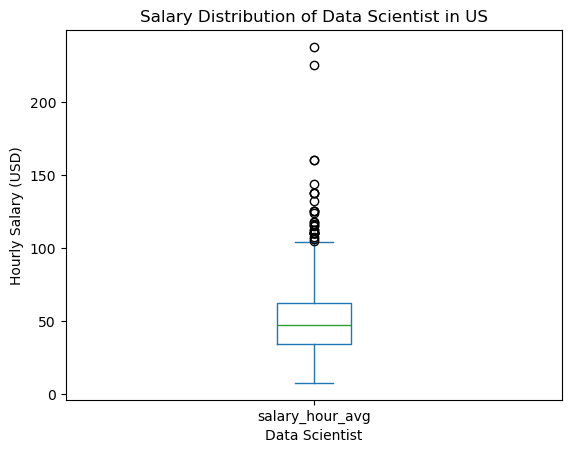

In [7]:
df_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].copy()
df_US.plot(kind='box', y='salary_hour_avg')
plt.title('Salary Distribution of Data Scientist in US')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary (USD)')
plt.show()

---

## 🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2)

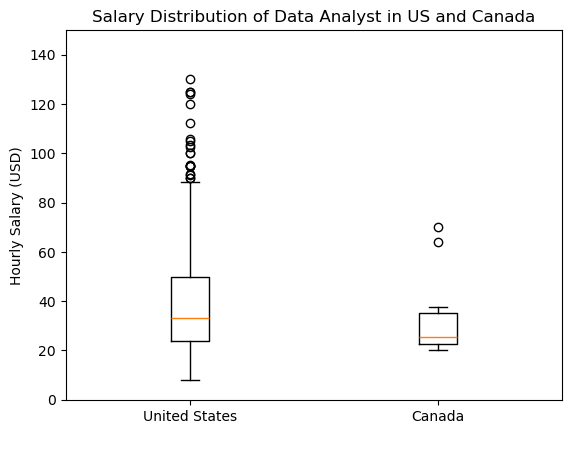

In [8]:
# Code Needed
countries = ['United States', 'Canada']
df_US_CA = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset='salary_hour_avg').copy()
df_list = [df_US_CA[df_US_CA['job_country'] == country]['salary_hour_avg'].copy() for country in countries]
df_list
plt.boxplot(df_list, labels=countries)
plt.title('Salary Distribution of Data Analyst in US and Canada')
plt.xlabel(' ')
plt.ylabel('Hourly Salary (USD)')
plt.ylim(0, 150)
plt.show()

---

## 🟥 Comparison of Hourly Salaries in Germany (2.18.3)

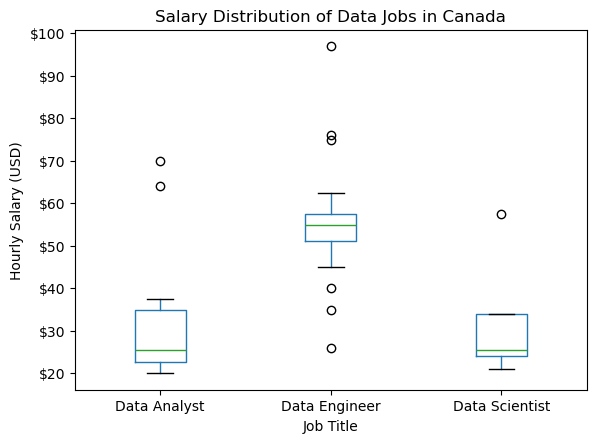

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
26310,Data Scientist,Data Scientist/Analyst,Canada,via LinkedIn,Contractor,False,Canada,2023-11-28 13:13:39,False,False,Canada,hour,NaN,57.500,eTeam,"[sql, python, r, word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
70830,Data Analyst,Junior Data Analyst - Remote (Work from Home),Anywhere,via The Elite Job,Full-time and Part-time,True,Canada,2023-11-24 00:16:07,True,False,Canada,hour,NaN,25.000,The Elite Job,"[python, r, sql, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
70869,Data Analyst,Remote Data Analyst Job at Online Retailer - A...,Anywhere,via Work Wise Careers,Full-time,True,Canada,2023-11-23 00:14:40,True,False,Canada,hour,NaN,26.000,Work Wise Careers/,"[sql, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."
73362,Data Analyst,Online Data Analyst (Part-time WFH),Anywhere,via The Elite Job,Full-time and Part-time,True,Canada,2023-12-01 00:13:29,True,False,Canada,hour,NaN,25.000,The Elite Job,"[python, r, sql]","{'programming': ['python', 'r', 'sql']}"
86859,Data Scientist,Data Research and Analysis Specialist (Work fr...,Anywhere,via The Elite Job,Full-time and Part-time,True,Canada,2023-12-04 00:05:45,True,False,Canada,hour,NaN,25.000,Amazon,"[python, r, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
164220,Data Engineer,Azure Data Tech Lead with 5G/Network experience,"Brampton, ON, Canada",via ZipRecruiter,Full-time,False,Canada,2023-07-18 15:35:28,True,False,Canada,hour,NaN,57.500,Danta Technologies,[azure],{'cloud': ['azure']}
164474,Data Engineer,Java Bigdata Developer,"Mississauga, ON, Canada",via LinkedIn,Contractor and Temp work,False,Canada,2023-09-27 15:20:07,False,False,Canada,hour,NaN,75.000,DISYS,"[java, sql, elasticsearch, spring, hadoop]","{'databases': ['elasticsearch'], 'libraries': ..."
180190,Data Engineer,Cloud Data Engineer,Anywhere,via Dice.com,Contractor,True,Canada,2023-07-24 15:13:36,True,False,Canada,hour,NaN,55.000,Zyreoneconsulting LLC,None,None
212339,Data Engineer,Backend Cloud Data Engineer - Node.JS,Anywhere,via Dice,Contractor,True,Canada,2023-03-31 22:14:50,False,False,Canada,hour,NaN,35.000,"KPI Partners, Inc.","[dynamodb, snowflake, aws, graphql, airflow, n...","{'cloud': ['snowflake', 'aws'], 'databases': [..."
277959,Data Engineer,Data Engineer,"Montreal, QC, Canada",via LinkedIn,Contractor,False,Canada,2023-07-13 07:09:55,False,False,Canada,hour,NaN,55.000,Applicantz,"[python, sql, snowflake, aws, pyspark, airflow...","{'analyst_tools': ['excel'], 'cloud': ['snowfl..."


In [13]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_Can = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].dropna(subset='salary_hour_avg').copy()

(fig, ax) = plt.subplots()
df_Can.boxplot(column='salary_hour_avg', by='job_title_short', ax=ax)
plt.suptitle('')

# Customize x-axis and y-axis labels
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.set_title('Salary Distribution of Data Jobs in Canada')

# Apply custom formatter to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.grid(False)

# Show the plot
plt.show()
df_Can

---